In [62]:
''' Required packages. Use python3 -m pip install xxx for all the packages. '''
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
import easypyplot
# Automatically update if external package code is modified
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
''' Plot knobs. Change only if you want to resize the graph, etc. '''
fig_dims = (4, 2)
fig_label_fontsize = 9
ft = fm.FontProperties('Times New Roman')
ft.set_size(fig_label_fontsize)

''' [TODO] Figure properties. Specify the csv file and corresponding labels. '''
csv_path = './sec2/rollback.csv'
workload_list = ['Rollback Time', 'Invalid Tail Size']
scheme_list = ['0', '1', '2']
workload_dict = {item: item for item in workload_list} # Change the mapping if you want a different figure label text instead of the csv column name
workload_dict['Rollback Time'] = 'Segment Access'
scheme_dict = {item: item for item in scheme_list}

fig_title = '' # TODO: figure title, shown as y-axis label
fig_path = './sec2/'
fig_name = 'rollback_motivation'
fig_ylim = (0, 5001)
fig_yticks = list(np.arange(fig_ylim[0], fig_ylim[1], 1000.0))
fig_colors = [easypyplot.color.COLOR_SET[i] for i in [1, 0]] # TODO: choose enough colors for schemes
FULL_MARKER_SET = ['o', '^', 'v', 's', 'D']
fig_marker = [FULL_MARKER_SET[i] for i in [0]] # TODO: choose enough markers for schemes
# assert len(fig_colors) == len(workload_dict)
# assert len(fig_marker) == len(workload_dict)

print("Expect {} lines and {} points within each bar".format(len(workload_dict), len(scheme_dict)))

Expect 2 lines and 3 points within each bar


In [64]:
''' Load data from file. '''
csv_hd = pd.read_csv(csv_path, sep=',')
# TODO assert workload_name
# TODO assert scheme_name
fig_xlabels = []
fig_xticks = []
fig_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    scheme_fullname = str(int(row[0]))
    if any(scheme in scheme_fullname for scheme in scheme_list):
        row_value = []
        for col in row.keys():
            if any(workload == col for workload in workload_dict):
                row_value.append(row[col])
        fig_data_2darr.append(row_value)
        fig_xlabels.append(scheme_fullname)
        xtick += 1
        fig_xticks.append(xtick)
fig_data_2darr = np.transpose(fig_data_2darr)
assert fig_data_2darr.shape[1] == len(fig_xlabels) == len(fig_xticks)

pprint(fig_data_2darr)

array([[1.000000e+00, 5.089877e+02, 4.025257e+03],
       [1.000000e+00, 1.797143e+02, 1.480714e+03]])


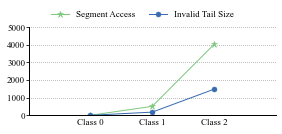

In [68]:
''' Ploting script '''
pp, fig = easypyplot.pdf.plot_setup(fig_path + fig_name, fig_dims)
# ax = fig.gca() # Only used with no subplot mode
fig_ax = fig.add_subplot(1, 1, 1) # Knob: plot the first subgraph of a 1x1 grid, i.e., no subplot mode
# rbratio_ax = fig_ax.twinx()
easypyplot.format.turn_off_box(fig_ax)

fig_h = []
np_data_2darr = np.array(fig_data_2darr)
rbtime_data_2darr = np_data_2darr[0]
rbratio_data_2darr = np_data_2darr[1]
rbtime_workload_list = workload_list[0]
fig_h += fig_ax.plot(fig_xticks, rbtime_data_2darr,
            marker='*',
            markersize = '7.0',
            linewidth = '1.0',
            color=fig_colors[0],
            )

''' x axis '''
fig_ax.xaxis.set_tick_params(pad=0) # Knob: distance between x tick label and x-axis
fig_ax.set_xlim([fig_ax.get_xticks()[0] - 0.5, fig_ax.get_xticks()[-1] + 0.5])
fig_ax.set_xticks(fig_xticks)
fig_xlabels = ['Class 0', 'Class 1', 'Class 2']
fig_ax.set_xticklabels(fig_xlabels, fontsize=fig_label_fontsize, fontproperties=ft)
fig_ax.xaxis.set_ticks_position('none') # Knob: uncomment for visible x ticks
# ax.tick_params(direction='in') # Knob: [in, out, inout]
# ax.set_xlabel(fig_title) # Knob: the overall x label text
''' y axis '''
# fig_ax.set_yscale('log')
fig_ax.yaxis.set_tick_params(pad=0) # Knob: distance between y tick label and y-axis
# easypyplot.format.set_axis_to_percent(fig_ax.yaxis) # Uncomment for y axis tick label in xx% format
fig_ax.yaxis.grid(True)
fig_ax.set_ylim(fig_ylim)
fig_ax.set_yticks(fig_yticks)
# fig_yticks_label = ["{:.2f}".format(item) for item in fig_yticks] # Change for customized y tick label text
# fig_ax.set_yticklabels(fig_yticks_label, fontproperties=ft)
fig_ax.set_ylabel(fig_title, multialignment='center', fontproperties=ft)

# rbratio_ax.set_ylim((0, 5000))
# rbratio_ax.set_yscale('log')
fig_h += fig_ax.plot(fig_xticks, rbratio_data_2darr,
            marker='o',
            markersize = '5.0',
            linewidth = '1.0',
            color=fig_colors[1],
            )


''' legend '''
legend = [workload_dict[item] for item in workload_dict]
fig.legend(fig_h, legend, loc='center right', frameon=False, prop=ft,
        bbox_to_anchor=(0.85, 1),
        ncol=2,
        numpoints=1,
        columnspacing=1.5, # padding between columns
        labelspacing=1, # padding between rows
        )

''' last resize '''
plt.tight_layout()
easypyplot.format.resize_ax_box(fig_ax, hratio=0.8)

In [66]:
''' Save figures'''
fig.savefig(fig_path + fig_name+'.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # BUG: it sometimes generates wierd chopped pdf figures
# fig.savefig(fig_name+'.svg', format="svg", bbox_inches = 'tight', transparent=False) # svg format